<a href="https://colab.research.google.com/github/s1063724/DeepLearningForNLPInPytorch/blob/master/s1063724.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple CNN model 操作練習 — 作業交卷說明
- 學生名字: 吳彬瑞 學號: s1063724 班級: 資工3B
- 交卷日期: 2020/6/1
- LINK: https://t.ly/J69s

## **習題說明:** 
1. 將本習題範本 copy 到您自己的 google drive 雲端硬碟，建議檔名為： [your-std-id].ipynb. https://t.ly/ycLA
1. 請更改第一個 cell 內容中的日期資料，並將學生名字設為你的名字。
1. 首先**執行**下面這行程式，請輸入 **seed = 你的學號末5碼**。
1. 請保留前面內容順訊，但在程式片段「**請修改以下 CNN model 結構**」中修改您的CNN model structure.
1. 記得將您的 ipynb 檔案按滑鼠右鍵，點選「共用」，權限改成:**「分享給知道連結的人」**,老師才能測試您的作業。
1. 利用 Runtime -> Run all (ctl-F9)，一次執行完畢後利用 File -> Print(ctl-P)產生 PDF檔後更名為 [your-id].PDF (e.g. s01234567.pdf) 
1. **交作業時請繳交PDF檔**. (習題計分以你的 Validating Accuracy分數為主要基準)


In [0]:
## CNN for CIFAR10 Object Recognition in Photographs

###################

# Set random seed for reproducibility.
%tensorflow_version 1.x

#seed = 543
seed = 37243
from numpy import random
random.seed(seed)
from tensorflow import set_random_seed
set_random_seed(seed)
import tensorflow as tf
tf.reset_default_graph()


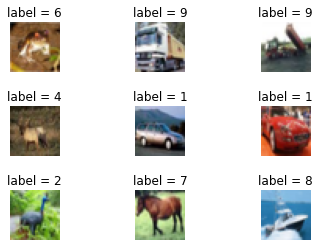

In [0]:

# Import modules and packages.

import numpy as np
import matplotlib.pyplot as plt
plt.ion() # interactive mode

from keras.datasets import cifar10

from keras.models import Sequential # for model
from keras.layers import Dense, Activation, Dropout, GlobalAveragePooling2D
from keras import optimizers
from keras.layers import Conv2D, MaxPool2D
from keras.utils import np_utils

# Load cifar10 dataset.

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train.shape # (50000, 32, 32, 3)
y_train.shape # (50000, 1)
np.unique(y_train)
np.bincount(y_train[:,0])

X_test.shape  # (10000, 32, 32, 3)
y_test.shape  # (10000, 1)
np.unique(y_test)
np.bincount(y_test[:,0])

# Figure 4.3.2: Plot 9 images: Create a grid of 3x3 images

plt.figure('Figure 4.3.2') 

for i in range(9):
	plt.subplots_adjust(hspace = 0.7, wspace = 0.5)
	plt.subplot(3, 3, 1 + i)
	plt.title('label = {}'.format(y_train[i][0]))
	plt.axis('off')
	plt.imshow(X_train[i])

plt.show()

In [0]:
# Normalize inputs from 0-255 (uint8) to 0.0-1.0 (float).

X_train = X_train/255.0
X_test = X_test/255.0

# one hot encoding outputs for classification problem

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

y_train.shape # (50000, 10), 10 classes 
y_test.shape  # (10000, 10), 10 classes

np.unique(y_train)
np.unique(y_test)

# Shorten the data to run faster, test only.

X_train = X_train[0:5000]
y_train = y_train[0:5000]
X_test = X_test[0:1000]
y_test = y_test[0:1000]

print(X_train.shape) # (5000, 32, 32, 3)
print(y_train.shape) # (5000, 10)
print(X_test.shape) # (1000, 32, 32, 3)
print(y_test.shape) # (1000, 10)

(5000, 32, 32, 3)
(5000, 10)
(1000, 32, 32, 3)
(1000, 10)


# **請修改以下 CNN model 結構：**

In [0]:

# Build the model.

model = Sequential()

input_shape=(32, 32, 3)
model.add(Conv2D(64,(3,3),input_shape=input_shape,padding='same',activation='relu'))
model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(MaxPool2D((2,2),strides=(2,2)))


model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
model.add(MaxPool2D((2,2),strides=(2,2)))


model.add(Conv2D(256,(3,3),padding='same',activation='relu'))
model.add(Conv2D(256,(3,3),padding='same',activation='relu'))
model.add(Conv2D(256,(3,3),padding='same',activation='relu'))
model.add(MaxPool2D((2,2),strides=(2,2)))

model.add(GlobalAveragePooling2D())
model.add(Dense(1000,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 256)        

In [0]:

# Compile the model.
# adam = optimizers.Adam(lr=0.01)
model.compile(loss = 'categorical_crossentropy', optimizer = 'Adamax', metrics = ['accuracy'])

# Fit the model.

mfit = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 500, batch_size = 32, verbose = 1)



Train on 5000 samples, validate on 1000 samples
Epoch 1/500
5000/5000 [==============================] - 2s 339us/step - loss: 2.3040 - accuracy: 0.0980 - val_loss: 2.3019 - val_accuracy: 0.1120
Epoch 2/500
5000/5000 [==============================] - 1s 295us/step - loss: 2.3024 - accuracy: 0.1014 - val_loss: 2.3019 - val_accuracy: 0.1060
Epoch 3/500
5000/5000 [==============================] - 1s 293us/step - loss: 2.2936 - accuracy: 0.1056 - val_loss: 2.4110 - val_accuracy: 0.1340
Epoch 4/500
5000/5000 [==============================] - 1s 292us/step - loss: 2.1095 - accuracy: 0.1894 - val_loss: 2.0185 - val_accuracy: 0.2290
Epoch 5/500
5000/5000 [==============================] - 1s 292us/step - loss: 1.9477 - accuracy: 0.2400 - val_loss: 1.8532 - val_accuracy: 0.2640
Epoch 6/500
5000/5000 [==============================] - 1s 291us/step - loss: 1.7789 - accuracy: 0.3024 - val_loss: 1.6785 - val_accuracy: 0.3790
Epoch 7/500
5000/5000 [==============================] - 1s 295us/step

1000/1000 [==============================] - 0s 135us/step
Validating Accuracy: 66.60%


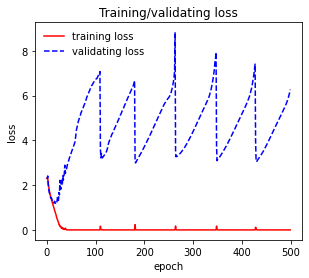

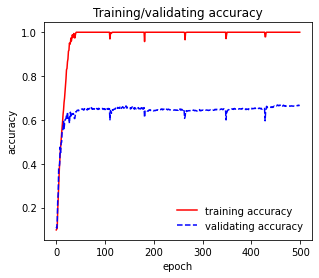

In [0]:
# Evaluate the model.

scores = model.evaluate(X_test, y_test, verbose = 0)

print("Validating Accuracy: %.2f%%" % (scores[1]*100))

# Figure 4.3.3(left): Plot loss vs epoch.

plt.figure('Figure 4.3.3(left)', figsize = (4.8, 4.0))
plt.plot(mfit.history['loss'], "r-")
plt.plot(mfit.history['val_loss'], "b--")
plt.title('Training/validating loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training loss', 'validating loss'], loc = "best", frameon = False) # loc=location
plt.show()

# Figure 4.3.3(right):Plot accuracy vs epoch.

plt.figure('Figure 4.3.3(right)', figsize = (4.8, 4.0)) 
plt.plot(mfit.history['accuracy'], "r-")
plt.plot(mfit.history['val_accuracy'], "b--")
plt.title('Training/validating accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training accuracy', 'validating accuracy'], loc = "best", frameon = False)
plt.show()

###################
